In [17]:
import kagglehub
path = kagglehub.dataset_download("snehaanbhawal/resume-dataset")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'resume-dataset' dataset.
Path to dataset files: /kaggle/input/resume-dataset


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
!pip install opencv-python numpy matplotlib

In [20]:
!pip install pdf2image

In [21]:
!apt-get update
!apt-get install -y poppler-utils


Get:1 https://cli.github.com/packages stable InRelease [3,917 B]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 3,917 B in 3s (1,447 B/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02

In [22]:
from pdf2image import convert_from_path

pdf_folder = "/content/drive/MyDrive/Datasets/data/data/ENGINEERING"
output_folder = "/content/drive/MyDrive/Datasets/OUTPUT_IMAGES"

os.makedirs(output_folder, exist_ok=True)

for pdf_file in os.listdir(pdf_folder):
    if pdf_file.lower().endswith(".pdf"):
        pdf_path = os.path.join(pdf_folder, pdf_file)

        pdf_name = os.path.splitext(pdf_file)[0]
        pdf_output_dir = os.path.join(output_folder, pdf_name)
        os.makedirs(pdf_output_dir, exist_ok=True)

        try:
            images = convert_from_path(
                pdf_path,
                dpi=300,
                fmt="png"
            )

            for i, image in enumerate(images):
                image_path = os.path.join(
                    pdf_output_dir, f"page_{i+1}.png"
                )
                image.save(image_path, "PNG")

            print(f" Converted: {pdf_file}")

        except Exception as e:
            print(f" Failed: {pdf_file} | Error: {e}")

 Converted: 10030015.pdf
 Converted: 10219099.pdf
 Converted: 10624813.pdf
 Converted: 10712803.pdf
 Converted: 10985403.pdf
 Converted: 11890896.pdf
 Converted: 11981094.pdf
 Converted: 12011623.pdf
 Converted: 12022566.pdf
 Converted: 12472574.pdf
 Converted: 12488356.pdf
 Converted: 12518008.pdf
 Converted: 12748557.pdf
 Converted: 13149176.pdf
 Converted: 13264796.pdf
 Converted: 14049846.pdf
 Converted: 14206561.pdf
 Converted: 14554542.pdf
 Converted: 15139979.pdf
 Converted: 15601399.pdf
 Converted: 15858254.pdf
 Converted: 15941675.pdf
 Converted: 16803215.pdf
 Converted: 16911115.pdf
 Converted: 17043822.pdf
 Converted: 17103000.pdf
 Converted: 17108676.pdf
 Converted: 17488801.pdf
 Converted: 17926546.pdf
 Converted: 18753367.pdf
 Converted: 19124258.pdf
 Converted: 19396040.pdf
 Converted: 19397727.pdf
 Converted: 19553067.pdf
 Converted: 19612167.pdf
 Converted: 20566550.pdf
 Converted: 20882041.pdf
 Converted: 20981299.pdf
 Converted: 21038022.pdf
 Converted: 21298336.pdf


In [27]:
import os
one_image_path=os.path.join(path,'/content/drive/MyDrive/Datasets/OUTPUT_IMAGES','/content/drive/MyDrive/Datasets/OUTPUT_IMAGES/10030015','png','10030015')

In [37]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def display_image(image, title="Image"):
    plt.figure(figsize=(12, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

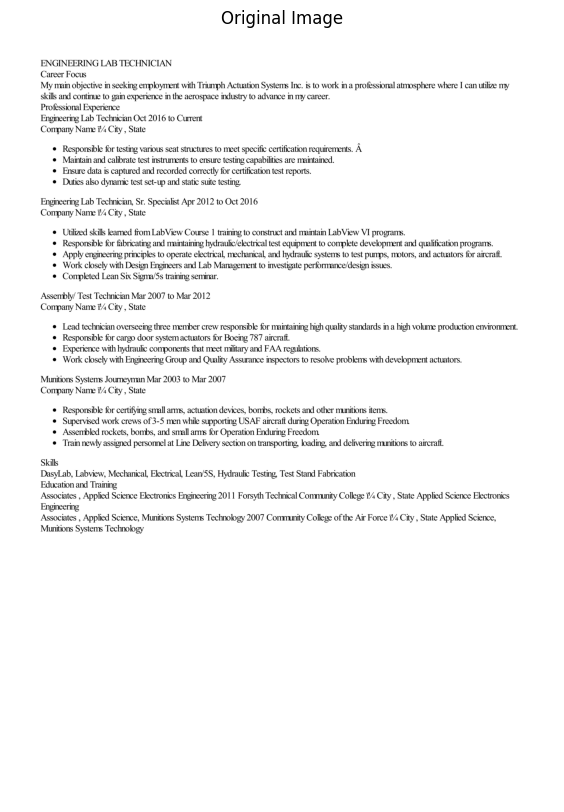

In [38]:
import os

# Correcting the image path to point to an actual image file
one_image_path = os.path.join('/content/drive/MyDrive/Datasets/OUTPUT_IMAGES', '10030015', 'page_1.png')

one_image = cv2.imread(one_image_path)

if one_image is not None:
    display_image(one_image, "Original Image")
else:
    print(f"Error: Image not loaded from path: {one_image_path}")

In [39]:
def convert_to_grayscale(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

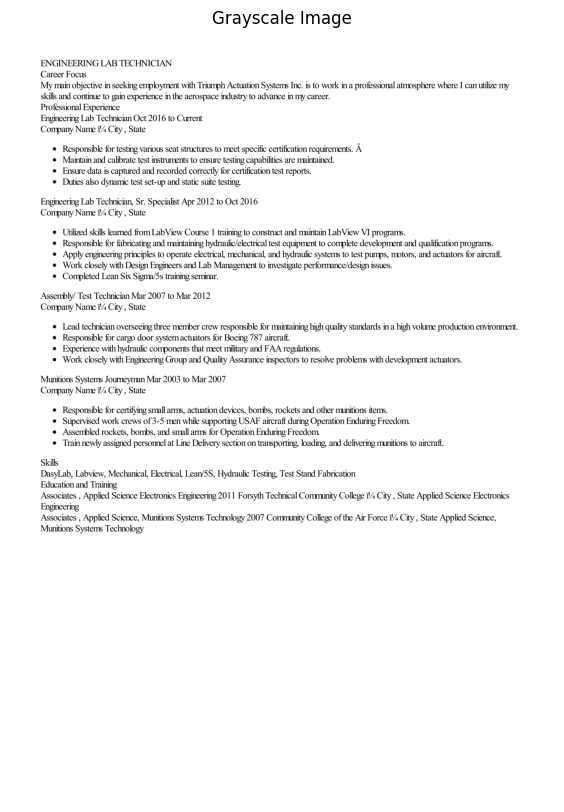

In [40]:
grayscale_image = convert_to_grayscale(one_image)
display_image(grayscale_image, "Grayscale Image")

In [50]:
def reduce_noise(grayscale_image):
  return cv2.GaussianBlur(grayscale_image, (5, 5), 0)

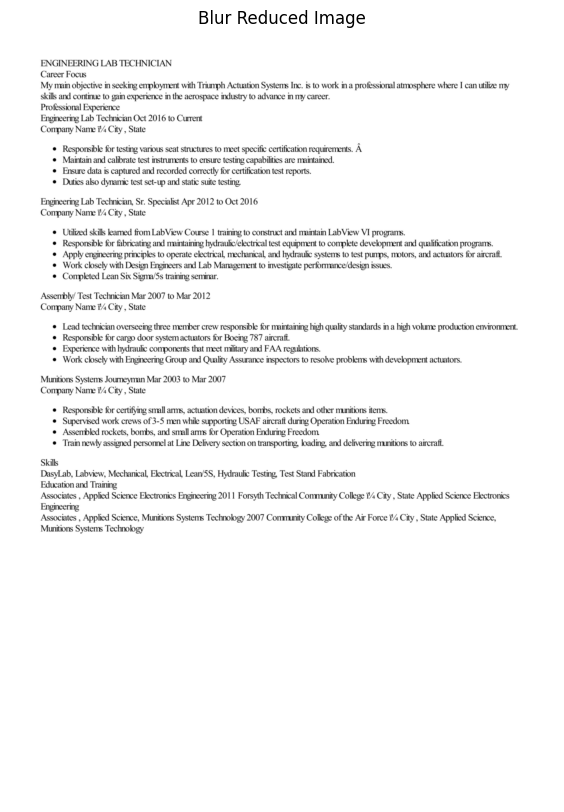

In [51]:
blur_reduced_image = reduce_noise(grayscale_image)
display_image(blur_reduced_image, "Blur Reduced Image")

In [52]:
def binarize_image(blur_reduced_image):
  return cv2.adaptiveThreshold(
    blur_reduced_image,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, # Invert the colors (text becomes white because of matplotlib)
    11, # Block size
    4  # Constant C
  )

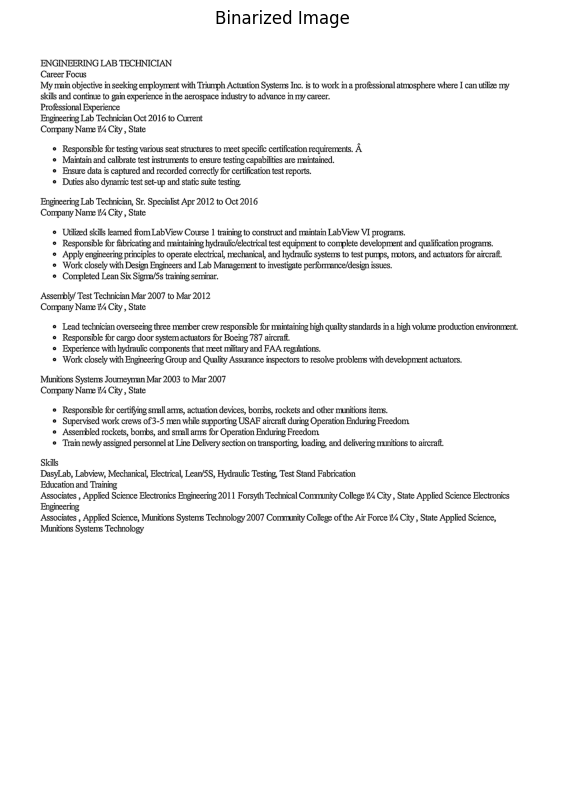

In [53]:
binarized_image = binarize_image(blur_reduced_image)
display_image(binarized_image, "Binarized Image")

In [54]:
def deskew_image(image):
    """
    Corrects the skew of an image by finding the minimum area rectangle
    of the text block and rotating accordingly.
    """
    # Find all non-zero (white) pixels
    coords = cv2.findNonZero(image)

    # Get the minimum area bounding rectangle
    # It returns (center(x,y), (width, height), angle of rotation)
    rect = cv2.minAreaRect(coords)
    angle = rect[-1] - 90

    # The `cv2.minAreaRect` angle has a specific range.
    # We need to adjust it for our rotation.
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = angle

    # Get the rotation matrix and rotate the image
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h),
                             flags=cv2.INTER_CUBIC,
                             borderMode=cv2.BORDER_REPLICATE)
    print(f"Detected skew angle: {angle:.2f} degrees")

    # Now, rotate the original grayscale image by the same angle
    (h, w) = rotated.shape
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    deskewed_gray = cv2.warpAffine(rotated, M, (w, h),
                                  flags=cv2.INTER_CUBIC,
                                  borderMode=cv2.BORDER_REPLICATE)

    return deskewed_gray

In [55]:
deskewed_image = deskew_image(binarized_image)

Detected skew angle: 0.00 degrees


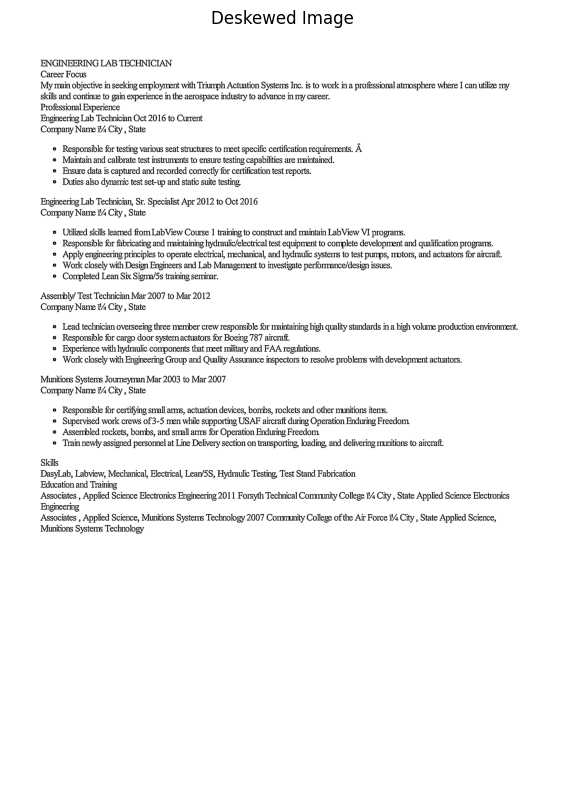

In [56]:
display_image(deskewed_image, "Deskewed Image")

In [57]:
def process_one_image(image):
  image = convert_to_grayscale(image)
  print("Converted image to grayscale..")
  image = reduce_noise(image)
  print("Reduced noise in the image..")
  image = binarize_image(image)
  print("Binarized the image..")
  image = deskew_image(image)
  print("Corrected image orientation..")
  return image

In [59]:
import os
import cv2
import time

output_root = "/content/drive/MyDrive/Datasets/OUTPUT_IMAGES"
start_time = time.time()

# Loop through each PDF folder
for folder_name in os.listdir(output_root):
    folder_path = os.path.join(output_root, folder_name)

    # Skip if not a folder
    if not os.path.isdir(folder_path):
        continue

    print(f"\n Processing folder: {folder_name}")

    # Loop through images inside the folder
    for image_name in os.listdir(folder_path):
        if not image_name.lower().endswith((".png", ".jpg", ".jpeg")):
            continue

        image_path = os.path.join(folder_path, image_name)
        print(f"Processing image: {image_path}")

        image = cv2.imread(image_path)
        if image is None:
            print("Failed to read image")
            continue

        processed_image = process_one_image(image)

        # Overwrite OR save separately
        output_path = os.path.join(folder_path, image_name)
        cv2.imwrite(output_path, processed_image)

        print(f"Saved: {output_path}")

print("\n Processing completed.")
print(f"Total time taken: {time.time() - start_time:.2f} seconds")



 Processing folder: 10030015
Processing image: /content/drive/MyDrive/Datasets/OUTPUT_IMAGES/10030015/page_1.png
Converted image to grayscale..
Reduced noise in the image..
Binarized the image..
Detected skew angle: 0.00 degrees
Corrected image orientation..
Saved: /content/drive/MyDrive/Datasets/OUTPUT_IMAGES/10030015/page_1.png

 Processing folder: 10219099
Processing image: /content/drive/MyDrive/Datasets/OUTPUT_IMAGES/10219099/page_1.png
Converted image to grayscale..
Reduced noise in the image..
Binarized the image..
Detected skew angle: 0.00 degrees
Corrected image orientation..
Saved: /content/drive/MyDrive/Datasets/OUTPUT_IMAGES/10219099/page_1.png
Processing image: /content/drive/MyDrive/Datasets/OUTPUT_IMAGES/10219099/page_2.png
Converted image to grayscale..
Reduced noise in the image..
Binarized the image..
Detected skew angle: 0.00 degrees
Corrected image orientation..
Saved: /content/drive/MyDrive/Datasets/OUTPUT_IMAGES/10219099/page_2.png

 Processing folder: 10624813
P

In [61]:
!pip install pytesseract pillow

In [62]:
from PIL import Image
import pytesseract

pytesseract.image_to_string(Image.open('/content/drive/MyDrive/Datasets/OUTPUT_IMAGES/10030015/page_1.png'))

'ENGINEERING LAB TECHNICIAN\n\nCareer Focus\n\nMy nin objective in seeking employment with Triumph Actuation Systems Inc. is to work in a professional atmosphere where I can utilize my\nskills and continue to gain experience in the aerospace industry to advance in my career.\n\nProfessional Experience\n\nEngineering Lab Technician Oct 2016 to Current\n\nCompany Name 14 City , State\n\n° Responsible for testing various seat structures to meet specific certification requirements. A\n© Maintain and calibrate test instruments to ensure testing capabilities are maintained.\n\n© Ensure data is captured and recorded correctly for certification test reports.\n\n© Duties also dynamic test set-up and static suite testing,\n\nEngineering Lab Technician, Sr. Specialist Apr 2012 to Oct 2016\nCompany Name 14 City , State\n\n© Utilized skills learned ftom LabView Course 1 training to construct and maintain LabView VI programs.\n© Responsible for fabricating and maintaining hydraulic/electrical test e

In [63]:
import os
import time
from PIL import Image
import pytesseract

input_root = "/content/drive/MyDrive/Datasets/OUTPUT_IMAGES"
output_root = "/content/drive/MyDrive/Datasets/EXTRACTED_TEXT"

os.makedirs(output_root, exist_ok=True)
start_time = time.time()

total_images = 0

# Count total images
for folder in os.listdir(input_root):
    folder_path = os.path.join(input_root, folder)
    if os.path.isdir(folder_path):
        total_images += sum(
            1 for f in os.listdir(folder_path)
            if f.lower().endswith((".png", ".jpg", ".jpeg"))
        )

print(f"Total images found: {total_images}")

processed = 0

# Process each folder
for folder_name in os.listdir(input_root):
    folder_path = os.path.join(input_root, folder_name)

    if not os.path.isdir(folder_path):
        continue

    print(f"\n Processing folder: {folder_name}")

    # Create matching output folder
    out_folder = os.path.join(output_root, folder_name)
    os.makedirs(out_folder, exist_ok=True)

    for image_name in os.listdir(folder_path):
        if not image_name.lower().endswith((".png", ".jpg", ".jpeg")):
            continue

        processed += 1
        image_path = os.path.join(folder_path, image_name)

        print(f" {processed}/{total_images} → {image_name}")

        try:
            image = Image.open(image_path)
            text = pytesseract.image_to_string(image)

            txt_name = os.path.splitext(image_name)[0] + ".txt"
            output_path = os.path.join(out_folder, txt_name)

            with open(output_path, "w", encoding="utf-8") as f:
                f.write(text)

        except Exception as e:
            print(f" Failed OCR: {image_name} | {e}")

print("\n Text Extraction Completed.")
print(f" Total time taken: {time.time() - start_time:.2f} seconds")


Total images found: 227

 Processing folder: 10030015
 1/227 → page_1.png

 Processing folder: 10219099
 2/227 → page_1.png
 3/227 → page_2.png

 Processing folder: 10624813
 4/227 → page_1.png
 5/227 → page_2.png

 Processing folder: 10712803
 6/227 → page_1.png
 7/227 → page_2.png

 Processing folder: 10985403
 8/227 → page_1.png
 9/227 → page_2.png

 Processing folder: 11890896
 10/227 → page_1.png
 11/227 → page_2.png

 Processing folder: 11981094
 12/227 → page_1.png
 13/227 → page_2.png

 Processing folder: 12011623
 14/227 → page_1.png
 15/227 → page_2.png

 Processing folder: 12022566
 16/227 → page_1.png

 Processing folder: 12472574
 17/227 → page_1.png
 18/227 → page_2.png
 19/227 → page_3.png

 Processing folder: 12488356
 20/227 → page_1.png
 21/227 → page_2.png

 Processing folder: 12518008
 22/227 → page_1.png
 23/227 → page_2.png

 Processing folder: 12748557
 24/227 → page_1.png
 25/227 → page_2.png

 Processing folder: 13149176
 26/227 → page_1.png
 27/227 → page_2.pn

In [7]:
prompt = """
Extract the information from the given image.
Information to be extracted: name, skills, certifications,experience.
The image has been converted to grayscale, noise reduced, binarized, and deskewed using opencv.
Always give your response in the following format:
{
    "name": "NAME",
    "skills": "SKILLS",
    "certifications": "CERTIFICATIONS",
    "experience": "EXPERIENCE",
}
Also, the text has been extracted from the image using tesseract.
Use the extracted text as support for extracting information.
If you believe the text extraction is incorrect somewhere, you may correct it yourself and provide corrected information.Extract relevant information from the text,suitable for job screening and resume analysi.
Respond with the extracted information only in the specified format.
Here is the text:

"""

In [14]:
from openai import OpenAI
from google.colab import userdata
OPENROUTER_API_KEY = "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"

In [15]:
import os
import json
import requests

MODEL = "openai/gpt-4o"

image_root = "/content/drive/MyDrive/Datasets/OUTPUT_IMAGES"
text_root = "/content/drive/MyDrive/Datasets/EXTRACTED_TEXT"
output_root = "/content/drive/MyDrive/Datasets/FINAL_OUTPUT"

os.makedirs(output_root, exist_ok=True)

print("  ONE IMAGE → JSON output")

# Pick first folder and first image
folder_name = next(
    f for f in os.listdir(image_root)
    if os.path.isdir(os.path.join(image_root, f))
)
image_folder = os.path.join(image_root, folder_name)
text_folder = os.path.join(text_root, folder_name)
output_folder = os.path.join(output_root, folder_name)
os.makedirs(output_folder, exist_ok=True)

image_name = next(
    f for f in os.listdir(image_folder)
    if f.lower().endswith((".png", ".jpg", ".jpeg"))
)

# Load OCR text
text_path = os.path.join(
    text_folder,
    os.path.splitext(image_name)[0] + ".txt"
)

with open(text_path, "r", encoding="utf-8") as f:
    ocr_text = f.read()[:1000]

final_prompt = "Extract structured information from the following OCR text:\n\n" + ocr_text

payload = {
    "model": MODEL,
    "messages": [
        {"role": "user", "content": final_prompt}
    ]
}

try:
    response = requests.post(
        "https://openrouter.ai/api/v1/chat/completions",
        headers={
            "Authorization": f"Bearer {OPENROUTER_API_KEY}",
            "Content-Type": "application/json"
        },
        json=payload,
        timeout=60
    )
    result = response.json()
except Exception as e:
    result = {"error": str(e)}

# Always-safe JSON
output_data = {
    "prompt": final_prompt,
    "raw_output": ""
}

if "error" in result:
    output_data["raw_output"] = str(result.get("error"))
elif "choices" in result:
    output_data["raw_output"] = result["choices"][0]["message"]["content"]
else:
    output_data["raw_output"] = str(result)

# Save JSON
output_path = os.path.join(
    output_folder,
    os.path.splitext(image_name)[0] + ".json"
)

with open(output_path, "w", encoding="utf-8") as f:
    json.dump(output_data, f, indent=4)

# 🔹 PRINT JSON TO SCREEN 🔹
print("\n FINAL JSON OUTPUT:")
print(json.dumps(output_data, indent=4))



  ONE IMAGE → JSON output

 FINAL JSON OUTPUT:
{
    "prompt": "Extract structured information from the following OCR text:\n\nENGINEERING LAB TECHNICIAN\n\nCareer Focus\n\nMy nin objective in seeking employment with Triumph Actuation Systems Inc. is to work in a professional atmosphere where I can utilize my\nskills and continue to gain experience in the aerospace industry to advance in my career.\n\nProfessional Experience\n\nEngineering Lab Technician Oct 2016 to Current\n\nCompany Name 14 City , State\n\n\u00b0 Responsible for testing various seat structures to meet specific certification requirements. A\n\u00a9 Maintain and calibrate test instruments to ensure testing capabilities are maintained.\n\n\u00a9 Ensure data is captured and recorded correctly for certification test reports.\n\n\u00a9 Duties also dynamic test set-up and static suite testing,\n\nEngineering Lab Technician, Sr. Specialist Apr 2012 to Oct 2016\nCompany Name 14 City , State\n\n\u00a9 Utilized skills learned f